# IHLT Lab 3: Morphology

**Authors:** *Zachary Parent ([zachary.parent](mailto:zachary.parent@estudiantat.upc.edu)), Carlos Jiménez ([carlos.humberto.jimenez](mailto:carlos.humberto.jimenez@estudiantat.upc.edu))*

### 2024-10-03

**Instructions:**

1. Read all pairs of sentences of the *SMTeuroparl* files of test set within the evaluation framework of the project.
2. Compute their similarities by considering lemmas and Jaccard distance.
3. Compare the results with those in session 2 (*document structure*) in which words were considered.
4. Compare the results with gold standard by giving the pearson correlation between them.
5. Questions (justify the answers):

    - Which is better: words or lemmas?
    - Do you think that could perform better for any pair of texts?


## Notes
- we should compare with previous results
- we should expect better results with lemmas
- we may find counter examples in which words are better than lemmas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import nltk
from nltk.metrics.distance import jaccard_distance

In [2]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Read data from Google Drive

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# BASE_PATH = '/content/drive/MyDrive/MASTER AI'

In [4]:
# Read data from local file system

BASE_PATH = '.'

In [5]:
assert BASE_PATH is not None, "BASE_PATH is not set"


In [6]:
dt = pd.read_csv(
    f"{BASE_PATH}/test-gold/STS.input.SMTeuroparl.txt", sep="\t", header=None
)
dt.columns = ["s1", "s2"]
dt["gs"] = pd.read_csv(
    f"{BASE_PATH}/test-gold/STS.gs.SMTeuroparl.txt", sep="\t", header=None
)
dt.head()

,s1,s2,gs
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00


In [7]:
wnl = nltk.stem.WordNetLemmatizer()
def lemmatize_one(word):
  x, pos = nltk.pos_tag([word])[0]
  d = {'NN': 'n', 'NNS': 'n', 
       'JJ': 'a', 'JJR': 'a', 'JJS': 'a', 
       'VB': 'v', 'VBD': 'v', 'VBG': 'v', 'VBN': 'v', 'VBP': 'v', 'VBZ': 'v', 
       'RB': 'r', 'RBR': 'r', 'RBS': 'r'}
  if pos in d:
    return wnl.lemmatize(word, pos=d[pos])
  return x

def lemmatize_many(words):
  return [lemmatize_one(word) for word in words]

In [8]:
dt['s1_tokens'] = dt["s1"].apply(lambda x: nltk.word_tokenize(x))
dt['s2_tokens'] = dt["s2"].apply(lambda x: nltk.word_tokenize(x))

dt['s1_tokens'] = dt['s1_tokens'].apply(lambda tokens: [token.lower() for token in tokens if token.isalnum()])
dt['s2_tokens'] = dt['s2_tokens'].apply(lambda tokens: [token.lower() for token in tokens if token.isalnum()])

dt["s1_lemmas"] = dt["s1_tokens"].apply(lambda x: lemmatize_many(x))
dt["s2_lemmas"] = dt["s2_tokens"].apply(lambda x: lemmatize_many(x))
dt["gs"] = dt.pop("gs")
dt.head(10)[['s1_lemmas', 's2_lemmas']]

,s1_lemmas,s2_lemmas
0,"[the, leader, have, now, be, give, a, new, cha...","[the, leader, benefit, aujourd, hui, of, a, ne..."
1,"[amendment, no, 7, proposes, certain, change, ...","[amendment, no, 7, be, propose, certain, chang..."
2,"[let, me, remind, you, that, our, ally, includ...","[i, would, like, to, remind, you, that, among,..."
3,"[the, vote, will, take, place, today, at]","[the, vote, will, take, place, at]"
4,"[the, fisherman, be, inactive, tire, and, disa...","[the, fisherman, be, inactive, tire, and, disa..."
5,"[neither, be, there, a, qualify, majority, wit...","[there, be, not, a, majority, voting, in, parl..."
6,"[it, increase, the, power, of, the, big, count...","[it, have, the, effect, of, augment, the, pote..."
7,"[the, fisherman, be, inactive, tire, and, disa...","[the, fisher, be, inactive, tire, and, disappo..."
8,"[the, leader, have, now, be, give, a, new, cha...","[leader, now, have, another, chance, to, let, ..."
9,"[the, vote, will, take, place, today, at]","[the, vote, will, take, place, at, 17h30]"


In [9]:
dt["jaccard"] = dt[["s1_lemmas", "s2_lemmas"]].apply(
    lambda x: jaccard_distance(set(x.iloc[0]), set(x.iloc[1])), axis=1
)
dt.head()

,s1,s2,s1_tokens,s2_tokens,s1_lemmas,s2_lemmas,gs,jaccard
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,"[the, leaders, have, now, been, given, a, new,...","[the, leaders, benefit, aujourd, hui, of, a, n...","[the, leader, have, now, be, give, a, new, cha...","[the, leader, benefit, aujourd, hui, of, a, ne...",4.50,0.652174
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,"[amendment, no, 7, proposes, certain, changes,...","[amendment, no, 7, is, proposing, certain, cha...","[amendment, no, 7, proposes, certain, change, ...","[amendment, no, 7, be, propose, certain, chang...",5.00,0.230769
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,"[let, me, remind, you, that, our, allies, incl...","[i, would, like, to, remind, you, that, among,...","[let, me, remind, you, that, our, ally, includ...","[i, would, like, to, remind, you, that, among,...",4.25,0.619048
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,"[the, vote, will, take, place, today, at]","[the, vote, will, take, place, at]","[the, vote, will, take, place, today, at]","[the, vote, will, take, place, at]",4.50,0.142857
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...","[the, fishermen, are, inactive, tired, and, di...","[the, fishermen, are, inactive, tired, and, di...","[the, fisherman, be, inactive, tire, and, disa...","[the, fisherman, be, inactive, tire, and, disa...",5.00,0.000000


In [10]:
pearsonr_gs_jaccard = pearsonr(
    dt["gs"], dt["jaccard"]
)
print(
    f"Pearsonr gs vs jaccard: {pearsonr_gs_jaccard[0]}, pvalue gs_jaccard: {pearsonr_gs_jaccard[1]}"
)

Pearsonr gs vs jaccard: -0.495848549238968, pvalue gs_jaccard: 7.42258997810512e-30


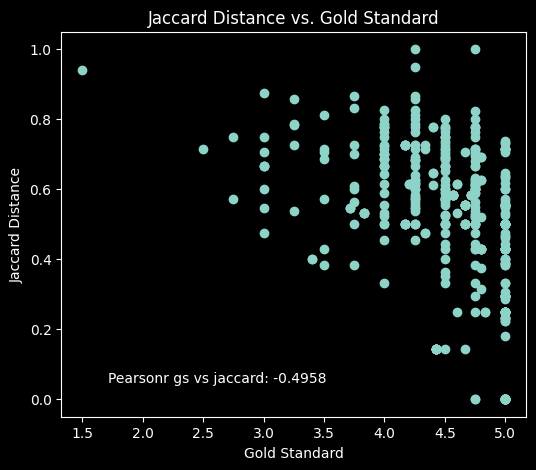

In [11]:
fig = plt.figure(figsize=(6, 5))
ax = plt.axes()

plt.scatter(dt["gs"], dt["jaccard"])
plt.xlabel("Gold Standard")
plt.ylabel("Jaccard Distance")
plt.title("Jaccard Distance vs. Gold Standard")
plt.text(
    0.1,
    0.1,
    f"Pearsonr gs vs jaccard: {pearsonr_gs_jaccard[0]:.4f}",
    transform=ax.transAxes,
    ha="left",
    va="center",
)
plt.show()